# Introduction

In this notebook, we analyse the oracles generated in **oracle_v2** notebook:
 
 * Feat_BR_volunteers
 * Feat_BR_expert
 * Feat_BR_volunteers_expert
 * TC_BR_volunteers
 * TC_BR_expert
 * TC_BR_volunteers_expert


# Load Libraries and Datasets

In [21]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd

from sklearn.metrics import cohen_kappa_score

from modules.utils import firefox_dataset_p2 as fd

from matplotlib import pyplot as plt

In [2]:
volunteers_oracle = fd.Tc_BR_Oracles.read_oracle_volunteers_df()
expert_oracle = fd.Tc_BR_Oracles.read_oracle_expert_df()
volunteers_expert_oracle = fd.Tc_BR_Oracles.read_oracle_expert_volunteers_df()
print()

feat_br_expert_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_df()
feat_br_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()
feat_br_expert_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_df()
print()

bugreports = fd.Datasets.read_selected_bug_reports_2_df()
testcases = fd.Datasets.read_testcases_df()

OracleVolunteers.shape: (207, 93)
OracleExpert.shape: (207, 93)
OracleExpertVolunteers.shape: (207, 93)

Expert and Volunteers Matrix.shape: (21, 93)
Volunteers Matrix 1 shape: (83, 21)
Volunteers Matrix 2 shape: (10, 21)
Volunteers Matrix shape: (93, 21)
Expert Matrix shape: (93, 21)

SelectedBugReports2.shape: (93, 22)
TestCases.shape: (207, 12)


# Cohen's Kappa - Features x Bug Reports Trace Matrix

The Cohen's Kappa Score measures the iter-rater agreement for qualitive answers (categorical items). It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In the section bellow, we calculate the Cohen's kappa with the expert answers and the volunteers answers.

In [3]:
expert_answers = []
volunteers_answers = []

for idx,row in feat_br_volunteers_oracle.iterrows():
    for col in feat_br_volunteers_oracle.columns:
        volunteers_answers.append(feat_br_volunteers_oracle.at[idx,col])
        expert_answers.append(feat_br_expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 1953
Volunteers Answers Length: 1953
Cohen Kappa Score: 0.46050047741726263


# Cohen's Kappa - Test Cases x Bug Reports Trace Matrix

In the section bellow, we calculate the Cohen's kappa based on two matrices:

* the matrix of Test Cases x Bug Reports generated from the answers of the **expert**
* the matrix of Test Cases x Bug Reports generated from the answers of the **volunteers**

In [4]:
expert_answers = []
volunteers_answers = []

for idx,row in volunteers_oracle.iterrows():
    for col in volunteers_oracle.columns:
        volunteers_answers.append(volunteers_oracle.at[idx,col])
        expert_answers.append(expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 19251
Volunteers Answers Length: 19251
Cohen Kappa Score: 0.5395092008465768


# Analysis of Amount of Affected Test Cases by Features

Analysis of the amount of test cases that are directly affected by a bug report after made the traceability between bug reports and features in the empirical study. We analyse the amount of affected test cases using three different matrices: expert answers only, volunteers answers only and the result of expert and volunteers answers.

In [5]:
bugreports.fillna("-1", inplace=True)

for idx, row in bugreports.iterrows():
    amount_aff_tcs_exp, amount_aff_tcs_vol, amount_aff_tcs_exp_vol = 0,0,0  # amount of affected testcases of feature
    for f_id in row.Features_IDs_exp_m.split(" "):
        if f_id != "":
            amount_aff_tcs_exp = amount_aff_tcs_exp + len(testcases[testcases.Feature_ID == int(f_id)])
    for f_id in row.Features_IDs_vol_m.split(" "):
        if f_id != "":
            amount_aff_tcs_vol = amount_aff_tcs_vol + len(testcases[testcases.Feature_ID == int(f_id)])
    for f_id in row.Features_IDs_exp_vol_m.split(" "):
        if f_id != "":
            amount_aff_tcs_exp_vol = amount_aff_tcs_exp_vol + len(testcases[testcases.Feature_ID == int(f_id)])

    bugreports.at[idx, 'Amount_Aff_TCs_Exp'] = amount_aff_tcs_exp
    bugreports.at[idx, 'Amount_Aff_TCs_Vol'] = amount_aff_tcs_vol
    bugreports.at[idx, 'Amount_Aff_TCs_Exp_Vol'] = amount_aff_tcs_exp_vol

cols = ['br_name','Features_IDs_exp_m','Features_IDs_vol_m','Features_IDs_exp_vol_m','Amount_Aff_TCs_Exp','Amount_Aff_TCs_Vol', 'Amount_Aff_TCs_Exp_Vol']   
display(bugreports[cols].head())

,br_name,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_m,Amount_Aff_TCs_Exp,Amount_Aff_TCs_Vol,Amount_Aff_TCs_Exp_Vol
0,BR_1181835_SRC,6,6,6,31.0,31.0,31.0
1,BR_1248267_SRC,-1,4,-1,0.0,6.0,0.0
2,BR_1248268_SRC,-1,-1,-1,0.0,0.0,0.0
3,BR_1257087_SRC,1,1,1,13.0,13.0,13.0
4,BR_1264988_SRC,-1,-1,-1,0.0,0.0,0.0


In [6]:
positives_amount_exp_only = bugreports.Amount_Aff_TCs_Exp.sum()
negatives_amount_exp_only = len(bugreports) * len(testcases) - positives_amount_exp_only
print("Total Amount of Expected Positive Links - Expert Only: {}".format(positives_amount_exp_only))
print("Total Amount of Expected Negative Links - Expert Only: {}".format(negatives_amount_exp_only))
print("Total Amount: {:>48}".format(positives_amount_exp_only + negatives_amount_exp_only))
print("Positives Percentual: {:>37.2f}%".format(float(positives_amount_exp_only/(positives_amount_exp_only+negatives_amount_exp_only)*100)))
print("Negatives Percentual: {:>38.2f}%".format(float(negatives_amount_exp_only/(positives_amount_exp_only+negatives_amount_exp_only)*100)))
print()

positives_amount_vol_only = bugreports.Amount_Aff_TCs_Vol.sum()
negatives_amount_vol_only = len(bugreports) * len(testcases) - positives_amount_vol_only
print("Total Amount of Expected Positive Links - Volunteers Only: {}".format(positives_amount_vol_only))
print("Total Amount of Expected Negative Links - Volunteers Only: {}".format(negatives_amount_vol_only))
print("Total Amount: {:>52}".format(positives_amount_vol_only + negatives_amount_vol_only))
print("Positives Percentual: {:>41.2f}%".format(float(positives_amount_vol_only/(positives_amount_vol_only+negatives_amount_vol_only)*100)))
print("Negatives Percentual: {:>42.2f}%".format(float(negatives_amount_vol_only/(positives_amount_vol_only+negatives_amount_vol_only)*100)))
print()

positives_amount_exp_vol = bugreports.Amount_Aff_TCs_Exp_Vol.sum()
negatives_amount_exp_vol = len(bugreports) * len(testcases) - positives_amount_exp_vol
print("Total Amount of Expected Positive Links - Expert & Volunteers: {}".format(positives_amount_exp_vol))
print("Total Amount of Expected Negative Links - Expert & Volunteers: {}".format(negatives_amount_exp_vol))
print("Total Amount: {:>56}".format(positives_amount_exp_vol + negatives_amount_exp_vol))
print("Positives Percentual: {:45.2f}%".format(float(positives_amount_exp_vol/(positives_amount_exp_vol+negatives_amount_exp_vol)*100)))
print("Negatives Percentual: {:46.2f}%".format(float(negatives_amount_exp_vol/(positives_amount_exp_vol+negatives_amount_exp_vol)*100)))

Total Amount of Expected Positive Links - Expert Only: 915.0
Total Amount of Expected Negative Links - Expert Only: 18336.0
Total Amount:                                          19251.0
Positives Percentual:                                  4.75%
Negatives Percentual:                                  95.25%

Total Amount of Expected Positive Links - Volunteers Only: 1355.0
Total Amount of Expected Negative Links - Volunteers Only: 17896.0
Total Amount:                                              19251.0
Positives Percentual:                                      7.04%
Negatives Percentual:                                      92.96%

Total Amount of Expected Positive Links - Expert & Volunteers: 642.0
Total Amount of Expected Negative Links - Expert & Volunteers: 18609.0
Total Amount:                                                  19251.0
Positives Percentual:                                          3.33%
Negatives Percentual:                                          96.67%


# Analysis of No Maching Answers

In [7]:
bugreports.Features_IDs_exp_m.replace("-1","", inplace=True)
bugreports.Features_IDs_vol_m.replace("-1","", inplace=True)
bugreports.Features_IDs_exp_vol_m.replace("-1","", inplace=True)

cols = ['br_name','Features_IDs_exp_m','Features_IDs_vol_m','Features_IDs_exp_vol_m','Amount_Aff_TCs_Exp','Amount_Aff_TCs_Vol', 'Amount_Aff_TCs_Exp_Vol']

print(bugreports[bugreports.Features_IDs_exp_m != bugreports.Features_IDs_vol_m][cols].shape)

bugreports[bugreports.Features_IDs_exp_m != bugreports.Features_IDs_vol_m][cols].head(90)

(53, 7)


,br_name,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_m,Amount_Aff_TCs_Exp,Amount_Aff_TCs_Vol,Amount_Aff_TCs_Exp_Vol
1,BR_1248267_SRC,,4,,0.0,6.0,0.0
5,BR_1267480_SRC,3,,,22.0,0.0,0.0
7,BR_1269348_SRC,3,,,22.0,0.0,0.0
11,BR_1271607_SRC,1,4,,13.0,6.0,0.0
13,BR_1277937_SRC,,18 20,,0.0,21.0,0.0
14,BR_1278388_SRC,1,4 7,,13.0,12.0,0.0
24,BR_1287384_SRC,,3,,0.0,22.0,0.0
25,BR_1287687_SRC,4,3,,6.0,22.0,0.0
27,BR_1287823_SRC,1,4,,13.0,6.0,0.0
29,BR_1289832_SRC,1,18,,13.0,16.0,0.0


In [8]:
bugreports[cols]

,br_name,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_m,Amount_Aff_TCs_Exp,Amount_Aff_TCs_Vol,Amount_Aff_TCs_Exp_Vol
0,BR_1181835_SRC,6,6,6,31.0,31.0,31.0
1,BR_1248267_SRC,,4,,0.0,6.0,0.0
2,BR_1248268_SRC,,,,0.0,0.0,0.0
3,BR_1257087_SRC,1,1,1,13.0,13.0,13.0
4,BR_1264988_SRC,,,,0.0,0.0,0.0
5,BR_1267480_SRC,3,,,22.0,0.0,0.0
6,BR_1267501_SRC,,,,0.0,0.0,0.0
7,BR_1269348_SRC,3,,,22.0,0.0,0.0
8,BR_1269485_SRC,,,,0.0,0.0,0.0
9,BR_1270274_SRC,6,6,6,31.0,31.0,31.0


# Distribution Amount BRs by TCs

[]

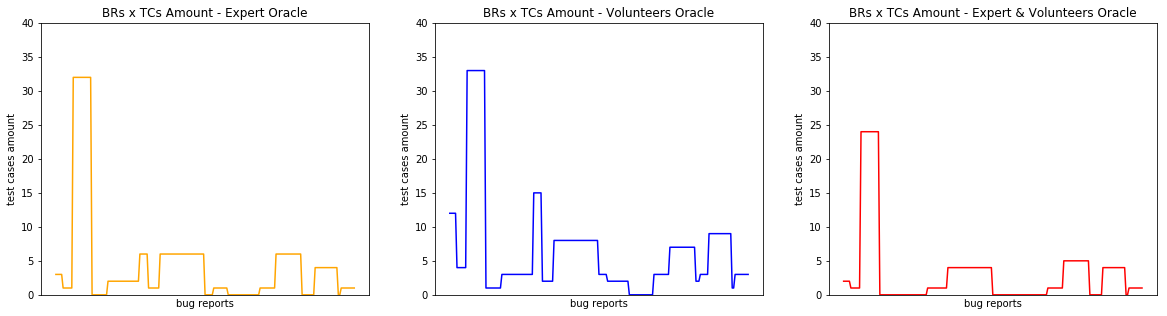

In [52]:
brs_expert = expert_oracle.index
tcs_amount_expert = expert_oracle.apply(lambda row : sum(row.values), axis=1)

brs_vol = volunteers_oracle.index
tcs_amount_vol = volunteers_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = volunteers_expert_oracle.index
tcs_amount_exp_vol = volunteers_expert_oracle.apply(lambda row : sum(row.values), axis=1)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.set_title('BRs x TCs Amount - Expert Oracle')
ax1.plot(brs_expert, tcs_amount_expert, color='orange')
ax1.set(xlabel='bug reports', ylabel='test cases amount')
ax1.set_ylim([0, 40])
ax1.xaxis.set_ticks([])

ax2.set_title('BRs x TCs Amount - Volunteers Oracle')
ax2.plot(brs_vol, tcs_amount_vol, color='blue')
ax2.set(xlabel='bug reports', ylabel='test cases amount')
ax2.set_ylim([0, 40])
ax2.xaxis.set_ticks([])

ax3.set_title('BRs x TCs Amount - Expert & Volunteers Oracle')
ax3.plot(brs_exp_vol, tcs_amount_exp_vol, color='red')
ax3.set(xlabel='bug reports', ylabel='test cases amount')
ax3.set_ylim([0, 40])
ax3.xaxis.set_ticks([])

# Analysis of Histograms of Test Cases Amounts

(array([129.,  47.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

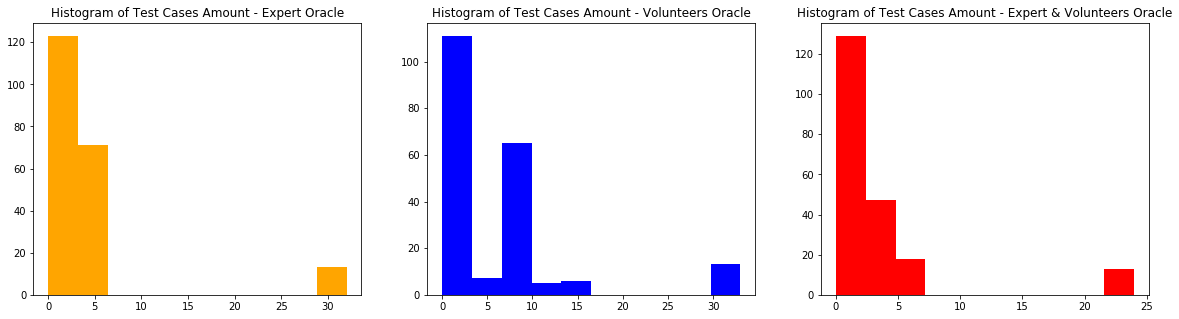

In [53]:
f2, (ax4,ax5,ax6) = plt.subplots(1, 3, figsize=(20,5))

ax4.set_title('Histogram of Test Cases Amount - Expert Oracle')
ax4.hist(tcs_amount_expert, color='orange')

ax5.set_title('Histogram of Test Cases Amount - Volunteers Oracle')
ax5.hist(tcs_amount_vol, color='blue')

ax6.set_title('Histogram of Test Cases Amount - Expert & Volunteers Oracle')
ax6.hist(tcs_amount_exp_vol, color='red')

We can observe that some bug reports are linked up to 31 test cases. So we must setup our IR-based models to return up to **31** test cases. In percentual terms, this represents 31/207 * 100 = 15%, this means the TOP values must have the value of **15**.